In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
def ask_for_tracker():
    print("Welcome! What Tracker API would you like to use?")
    print("Enter 0 for BOOSTING: ")
    print("Enter 1 for MIL: ")
    print("Enter 2 for KCF: ")
    print("Enter 3 for TLD: ")
    print("Enter 4 for MEDIANFLOW: ")
    choice = input("Please select your tracker: ")
    
    if choice == '0':
        tracker = cv2.TrackerBoosting_create()
    if choice == '1':
        tracker = cv2.TrackerMIL_create()
    if choice == '2':
        tracker = cv2.TrackerKCF_create()
    if choice == '3':
        tracker = cv2.TrackerTLD_create()
    if choice == '4':
        tracker = cv2.TrackerMedianFlow_create()


    return tracker

In [3]:
#tracker = ask_for_tracker()

Welcome! What Tracker API would you like to use?
Enter 0 for BOOSTING: 
Enter 1 for MIL: 
Enter 2 for KCF: 
Enter 3 for TLD: 
Enter 4 for MEDIANFLOW: 


Please select your tracker:  0


In [4]:
#tracker

<TrackerBoosting 0000027C41C8CE70>

In [5]:
#str(tracker).split()[0][1:]

'TrackerBoosting'

In [4]:
hanoi  = cv2.imread('DATA/hanoi6.jpg')
scale_percent = 30 # percent of original size
width = int(hanoi.shape[1]* scale_percent / 100)
height = int(hanoi.shape[0] * scale_percent / 100)
dim = (width, height)
hanoismall = cv2.resize(hanoi, dim,  interpolation = cv2.INTER_AREA )

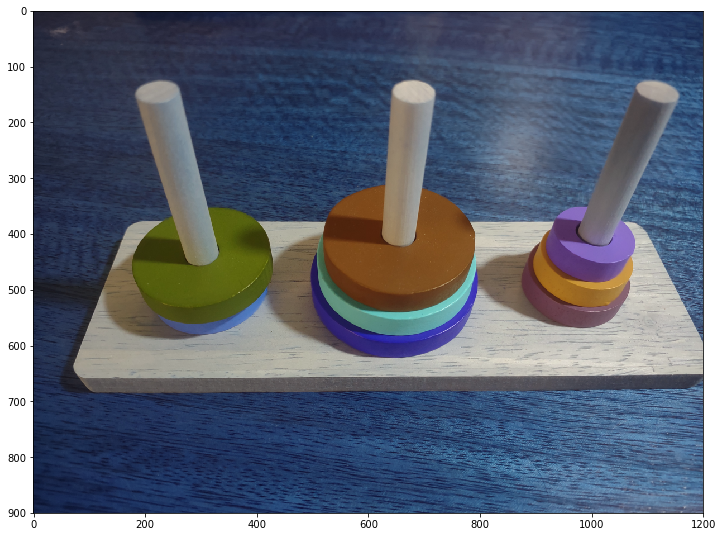

In [5]:
display(hanoismall)

In [10]:
tracker = ask_for_tracker()
tracker_name = str(tracker).split()[0][1:]

# Read video
cap = cv2.VideoCapture(1)

# Read first frame.
ret, frame = cap.read()


# Special function allows us to draw on the very first frame our desired ROI
#comento la siguiente linea porque voy a usar una imagen para que la trackee el sistema
roi = cv2.selectROI(frame, False)
#roi_fixed  = cv2.imread('DATA/hanoi6.jpg')
#roi =  cv2.selectROI(roi_fixed, False)

# Initialize tracker with first frame and bounding box
ret = tracker.init(frame, roi)

while True:
    # Read a new frame
    ret, frame = cap.read()
    
    
    # Update tracker
    success, roi = tracker.update(frame)
    
    # roi variable is a tuple of 4 floats
    # We need each value and we need them as integers
    (x,y,w,h) = tuple(map(int,roi))
    
    # Draw Rectangle as Tracker moves
    if success:
        # Tracking success
        p1 = (x, y)
        p2 = (x+w, y+h)
        cv2.rectangle(frame, p1, p2, (0,255,0), 3)
    else :
        # Tracking failure
        cv2.putText(frame, "Failure to Detect Tracking!!", (100,200), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),3)

    # Display tracker type on frame
    cv2.putText(frame, tracker_name, (20,400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),3);

    # Display result
    cv2.imshow(tracker_name, frame)

    # Exit if ESC pressed
    k = cv2.waitKey(1) & 0xff
    if k == 27 : 
        break
        
cap.release()
cv2.destroyAllWindows()

Welcome! What Tracker API would you like to use?
Enter 0 for BOOSTING: 
Enter 1 for MIL: 
Enter 2 for KCF: 
Enter 3 for TLD: 
Enter 4 for MEDIANFLOW: 


Please select your tracker:  3
